In [1]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

import qubx
%qubxd dev

%load_ext autoreload
%autoreload 2
from qubx import lookup
from qubx.core.basics import Instrument, FuturesInfo
from qubx.utils.marketdata.binance import get_binance_symbol_info_for_type
from qubx.pandaz import scols
import qubx.pandaz.ta as pa

 >  [dev] installing cython rebuilding hook

⠀⠀⡰⡖⠒⠒⢒⢦⠀⠀   
⠀⢠⠃⠈⢆⣀⣎⣀⣱⡀  QUBX | Quantitative Backtesting Environment 
⠀⢳⠒⠒⡞⠚⡄⠀⡰⠁         (c) 2024, ver. Dev
⠀⠀⠱⣜⣀⣀⣈⣦⠃⠀⠀⠀ 
        


# mstruct -> Struct

In [2]:
from qubx.utils import Struct

In [3]:
y = Struct(Struct(x=1), b=Struct(x=1), c = 555)
y

Struct(x=1, b=Struct(x=1), c=555)

In [4]:
y | {'a1': 2}

Struct(x=1, b=Struct(x=1), c=555, a1=2)

In [5]:
y.ast = 1

In [6]:
dict(s=1)

{'s': 1}

In [7]:
y

Struct(x=1, b=Struct(x=1), c=555, a1=2, ast=1)

# Market info and symbols

In [3]:
s0 = lookup.instruments['BINANCE:ETH.*']
s1 = lookup.instruments['DUKAS:EURGBP']

In [4]:
(
    lookup.find_aux_instrument_for(s0[0], 'USDT'), 
    lookup.find_aux_instrument_for(s0[1], 'USDT'), 
    lookup.find_aux_instrument_for(s1[0], 'USD'),
)

(Instrument(symbol='BTCUSDT', market_type='CRYPTO', exchange='BINANCE', base='BTC', quote='USDT', margin_symbol=None, min_tick=0.01, min_size_step=1e-05, min_size=1e-05, futures_info=None, _aux_instrument=None),
 None,
 Instrument(symbol='GBPUSD', market_type='FX', exchange='DUKAS', base='GBP', quote='USD', margin_symbol='USD', min_tick=1e-05, min_size_step=1, min_size=1000, futures_info=None, _aux_instrument=None))

# Fees

In [14]:
lookup.fees['bitmex_tierb_xbt'], lookup.fees['binance.um']

([('bitmex_tierb_xbt', (0.02, 0.075))],
 [('binance.um_vip0_usdt', (0.02, 0.05)),
  ('binance.um_vip1_usdt', (0.016, 0.04)),
  ('binance.um_vip2_usdt', (0.014, 0.035)),
  ('binance.um_vip3_usdt', (0.012, 0.032)),
  ('binance.um_vip4_usdt', (0.01, 0.03)),
  ('binance.um_vip5_usdt', (0.008, 0.027)),
  ('binance.um_vip6_usdt', (0.006, 0.025)),
  ('binance.um_vip7_usdt', (0.004, 0.022)),
  ('binance.um_vip8_usdt', (0.002, 0.02)),
  ('binance.um_vip9_usdt', (0.0, 0.017))])

In [12]:
lookup.find_fees('binance.um', 'vip0_usdt')

<binance.um_vip0_usdt: 0.0200 / 0.0500>

In [ ]:
lookup.fees

# Old Qube ta stuff

In [2]:
pa.smooth(pd.Series([1,2,3,4,5,6,6]), 'sma', 5)

0    NaN
1    NaN
2    NaN
3    NaN
4    3.0
5    4.0
6    4.8
Name: sma_5, dtype: float64

In [3]:
pa.sma(pd.Series([1,2,3,4,5,6,6]), 5)

0    NaN
1    NaN
2    NaN
3    NaN
4    3.0
5    4.0
6    4.8
Name: sma_5, dtype: float64

In [4]:
pa.column_vector(np.array([[1,2,3,4,5,6,7,8,9], [11,22,33,44,55,66,77,88,99]]).T)

array([[ 1, 11],
       [ 2, 22],
       [ 3, 33],
       [ 4, 44],
       [ 5, 55],
       [ 6, 66],
       [ 7, 77],
       [ 8, 88],
       [ 9, 99]])

In [5]:
pd.Series(np.random.randn(100))

0     1.578849
1     0.363952
2     0.384497
3     2.007192
4     0.082802
        ...   
95    0.697371
96   -1.452295
97    0.520995
98    1.785636
99   -1.455250
Length: 100, dtype: float64

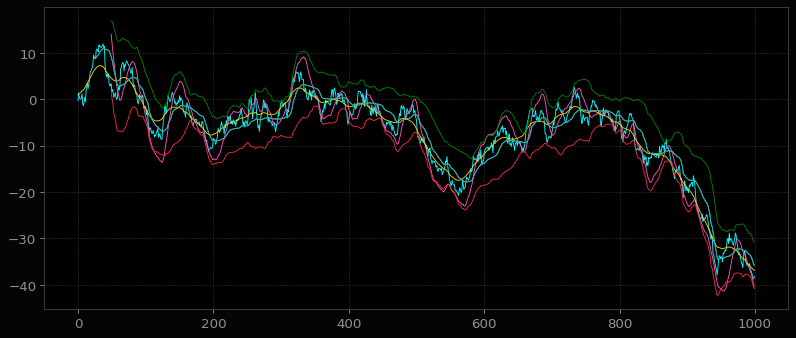

In [6]:
s = pd.Series(np.random.randn(1000)).cumsum()
plt.plot(s)
plt.plot(pa.kama(s, 25))
plt.plot(pa.zlema(s, 25))
plt.plot(pa.bidirectional_ema(s, 25))
plt.plot(pa.bollinger(s, 25, mean=pa.kama))

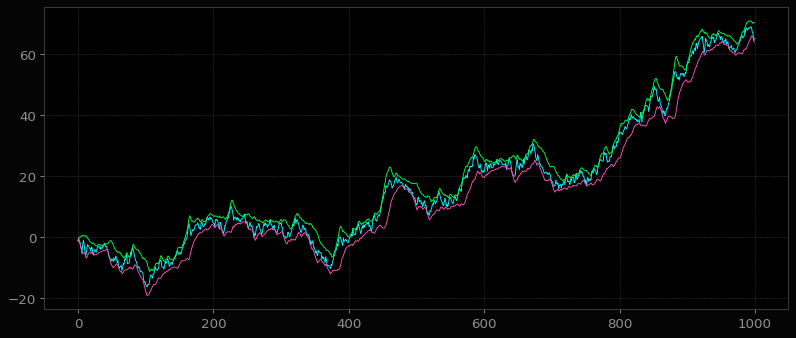

In [32]:
plt.plot(s)
_pw = pa.pwma(s, 0.9, 0.5, 10)
plt.plot(_pw['Mean'] + 2*_pw['Std'])
plt.plot(_pw['Mean'] - 2*_pw['Std'])